In [141]:
%load_ext autoreload
%autoreload 2

from simulation import  *
from columns import Column, DatasetContext, train_stdp, infer_stdp
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.nn.parameter import Parameter
import torchvision
from torchvision import transforms

from SpykeTorch import snn
from SpykeTorch import functional as sf
from SpykeTorch import visualization as vis
from SpykeTorch import utils

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import matplotlib.cm

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
length = 3
timesteps = 4 # Resolution for timesteps and weights
window_size = 2
num_neurons = 60 # Number of excitatory neurons in the column
threshold = 8 # Firing threshold for every excitatory neuron
rf_size = window_size*2
inchannels = 1


simulation = Simulation()
corpus = Corpus()
sentences = simulation.construct_sentences()
tokens = corpus.tokenize(sentences)



corpus.dictionary.get_encoding(length,timesteps)
spike_data = SpikeData(tokens, sentences, corpus)
spike_input, spike_output = spike_data.convert_tokens(window_size)

In [114]:
spike_input = np.array([np.hstack((s,3-s)) for s in spike_input])
length = 6

In [115]:
spike_input.shape

(33600, 4, 6)

In [156]:
### Column Initialization ###
from columns import Column, DatasetContext, train_stdp

column = Column([num_neurons,num_neurons], [threshold, threshold], 200, 0, rf_size, length, timesteps)
dataset_context = DatasetContext(['cat','eats'],corpus,spike_input, spike_output, timesteps) 


In [157]:
dataset_context.data_size

960

In [158]:
train_loader = DataLoader(dataset_context,
                          batch_size=1000,
                          shuffle=True)

In [159]:
# test_data = train_loader.dataset[0]
# print(test_data.shape)
# column(test_data)

In [160]:
result = train_stdp(dataset_context, column, 20)

  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([960, 4, 1, 4, 6])


100%|██████████| 1/1 [00:05<00:00,  5.32s/it]

Training done under  5.3202760219573975


In [163]:
test_result = infer_stdp(dataset_context, column)

100%|██████████| 1/1 [00:04<00:00,  4.92s/it]


In [175]:
# sns.heatmap(test_result[:480,:])

In [176]:
# sns.heatmap(test_result[480:,:])

In [177]:
def plot_mesh(result):
    X = np.linspace(0, result.shape[1],result.shape[1])
    Y = np.linspace(0, result.shape[0],result.shape[0])
    X, Y = np.meshgrid(X, Y)

    plt.figure(figsize = (10,10))

    plt.contourf(X, Y, result, [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], cmap='magma')
    plt.colorbar(ticks=range(5))
    plt.ylabel("learning")
    plt.xlabel("feature")
    # ax.plot_surface(X,Y,result.numpy())
#     print(result.numpy().shape)
#     print(X.shape)

#     result[result<4] = 0
#     result[result==4] = 1
#     four = torch.sum(result, dim = 1)
#     print(torch.max(four))

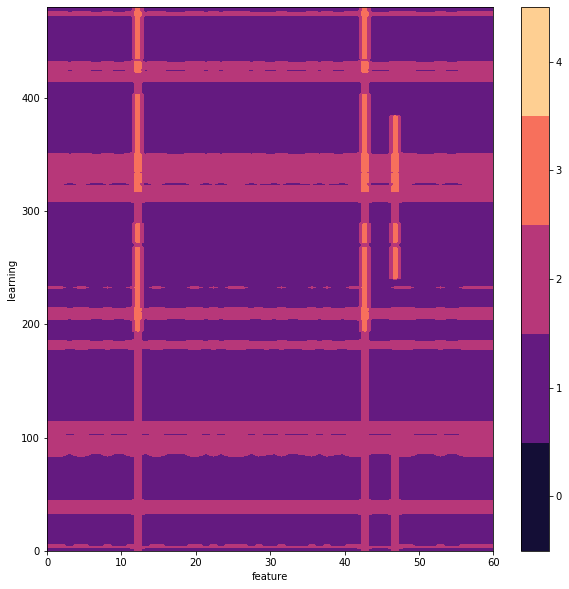

In [178]:
plot_mesh(test_result[480:,:])

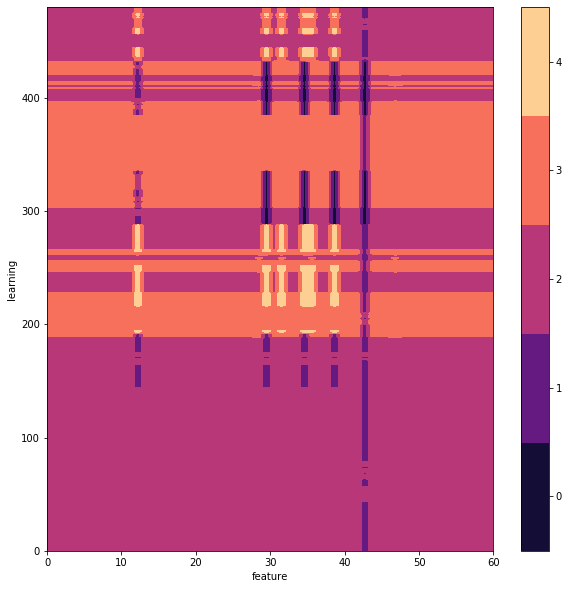

In [179]:
plot_mesh(test_result[:480,:])

In [38]:

### Column Initialization ###

MyColumn2 = Column(num_neurons, threshold, 8, 0)

    
dog = DatasetContext(sit_context)
trainLoader = DataLoader(dog, batch_size=1000, shuffle=True)

num_epochs = 15
result2 = torch.zeros(num_epochs*dog.__len__(), num_neurons)
for epochs in range(num_epochs):
    start = time.time()
    cnt = 0
    for data in tqdm(trainLoader):
        for i in range(len(data)):
            out = MyColumn2(data[i])
            result2[epochs*480+i, :] = torch.sum(out.squeeze(),dim=0)
            MyColumn2.stdp(data[i],out)
    end = time.time()
    print("Training done under ", end-start)

  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.0010170936584473


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.1255838871002197


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  0.9129364490509033


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  0.9335274696350098


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.1220498085021973


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  0.986626148223877


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  0.9880578517913818


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  0.8989684581756592


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.239969253540039


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.2384588718414307


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.5972001552581787


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.5579774379730225


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.6027183532714844


  0%|          | 0/1 [00:00<?, ?it/s]

Training done under  1.649308443069458


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

Training done under  1.4293889999389648


(7200, 60)
[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 4. 0. 4. 4. 0. 0. 0. 0. 0. 4. 4. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0.
 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


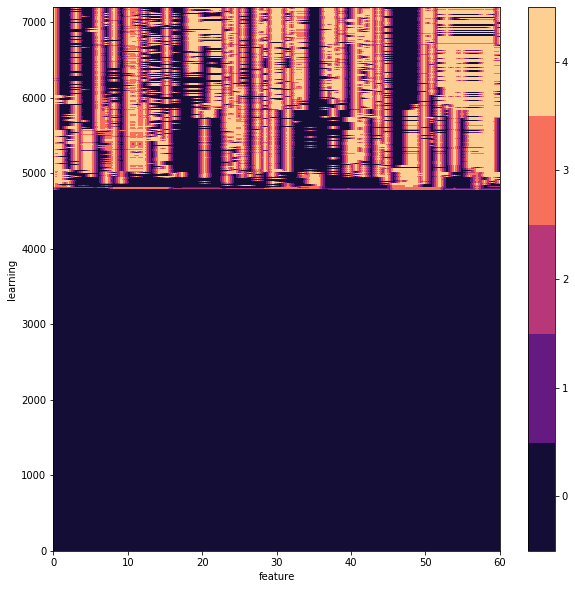

In [39]:
X = np.linspace(0, result2.size(1),result2.size(1))
Y = np.linspace(0, result2.size(0),result2.size(0))
X, Y = np.meshgrid(X, Y)

plt.figure(figsize = (10,10))

plt.contourf(X, Y, result2.numpy(), [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], cmap='magma')
plt.colorbar(ticks=range(5))
plt.ylabel("learning")
plt.xlabel("feature")
# ax.plot_surface(X,Y,result.numpy())
print(result2.numpy().shape)
print(result2.numpy()[-1,:])


In [40]:
print(result2.numpy()[-2,:])
print(result2.numpy()[-3,:])
print(result2.numpy()[-4,:])

print(result2.numpy()[0,:])


[3. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 4. 0. 0. 0. 0.
 0. 4. 4. 0. 0. 0. 0. 0. 0. 4. 0. 4.]
[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 3. 0. 3. 3. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 3. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 4. 4. 4. 4. 4. 4. 4. 4. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [41]:
temporal_transform = utils.Intensity2Latency(timesteps)

### Column Initialization ###

MyColumn = Column(num_neurons, threshold, 8, 0)
    
cat = DatasetContext(cat_context)
sit = DatasetContext(sit_context)

trainLoader1 = DataLoader(cat, shuffle=True)
trainLoader2 = DataLoader(sit, shuffle = True)

num_epochs = 20
result1 = torch.zeros(num_epochs*(cat.__len__()), num_neurons)
result2 = torch.zeros(num_epochs*(sit.__len__()), num_neurons)
result3 = torch.zeros(num_epochs*(cat.__len__()), num_neurons)

for epochs in range(num_epochs):
    start = time.time()
    cnt = 0
    for data in tqdm(trainLoader1):
        for i in range(len(data)):
            out = MyColumn(data[i])
            result1[epochs*480+i, :] = torch.sum(out.squeeze(),dim=0)
            MyColumn.stdp(data[i],out)
    end = time.time()
    print("Training done under ", end-start)

for epochs in range(num_epochs):
    start = time.time()
    cnt = 0
    for data in tqdm(trainLoader2):
        for i in range(len(data)):
            out = MyColumn(data[i])
            result2[epochs*480+i, :] = torch.sum(out.squeeze(),dim=0)
            MyColumn.stdp(data[i],out)
    end = time.time()
    print("Training done under ", end-start)

for epochs in range(num_epochs):
    start = time.time()
    cnt = 0
    for data in tqdm(trainLoader1):
        for i in range(len(data)):
            out = MyColumn(data[i])
            result3[epochs*480+i, :] = torch.sum(out.squeeze(),dim=0)
            MyColumn.stdp(data[i],out)
    end = time.time()
    print("Training done under ", end-start)

  8%|▊         | 38/480 [00:00<00:01, 378.16it/s]

Training done under  1.1821651458740234


  8%|▊         | 38/480 [00:00<00:01, 378.76it/s]

Training done under  1.2808358669281006


  8%|▊         | 39/480 [00:00<00:01, 382.79it/s]

Training done under  1.2834537029266357


 11%|█         | 52/480 [00:00<00:00, 515.04it/s]

Training done under  1.1572041511535645


  8%|▊         | 38/480 [00:00<00:01, 373.16it/s]

Training done under  0.9891338348388672


 11%|█         | 51/480 [00:00<00:00, 501.30it/s]

Training done under  1.0532972812652588


 10%|█         | 50/480 [00:00<00:00, 492.57it/s]

Training done under  1.2752106189727783


  8%|▊         | 38/480 [00:00<00:01, 374.19it/s]

Training done under  0.9405341148376465


 11%|█         | 52/480 [00:00<00:00, 519.42it/s]

Training done under  1.1766643524169922


  8%|▊         | 38/480 [00:00<00:01, 373.64it/s]

Training done under  1.1618561744689941


 11%|█         | 53/480 [00:00<00:00, 527.77it/s]

Training done under  1.0440468788146973


  7%|▋         | 34/480 [00:00<00:01, 339.15it/s]

Training done under  1.1722686290740967


  8%|▊         | 37/480 [00:00<00:01, 369.38it/s]

Training done under  1.4049832820892334


 11%|█         | 52/480 [00:00<00:00, 518.51it/s]

Training done under  1.1911976337432861


  8%|▊         | 38/480 [00:00<00:01, 377.37it/s]

Training done under  0.9604771137237549


  8%|▊         | 38/480 [00:00<00:01, 378.75it/s]

Training done under  1.2799501419067383


 10%|█         | 50/480 [00:00<00:00, 498.91it/s]

Training done under  1.1182022094726562


  6%|▋         | 30/480 [00:00<00:01, 291.03it/s]

Training done under  1.1997125148773193


  9%|▊         | 41/480 [00:00<00:01, 407.56it/s]

Training done under  1.6041641235351562


  6%|▋         | 30/480 [00:00<00:01, 295.17it/s]

Training done under  1.4996075630187988


  8%|▊         | 40/480 [00:00<00:01, 398.13it/s]

Training done under  1.3771867752075195


  7%|▋         | 34/480 [00:00<00:01, 331.22it/s]

Training done under  1.2889471054077148


  8%|▊         | 40/480 [00:00<00:01, 392.91it/s]

Training done under  1.2865149974822998


  6%|▌         | 28/480 [00:00<00:01, 274.05it/s]

Training done under  1.5935311317443848


  6%|▌         | 28/480 [00:00<00:01, 278.96it/s]

Training done under  1.7534246444702148


  8%|▊         | 39/480 [00:00<00:01, 388.49it/s]

Training done under  1.4747915267944336


  6%|▋         | 30/480 [00:00<00:01, 293.06it/s]

Training done under  1.5289945602416992


  6%|▌         | 29/480 [00:00<00:01, 288.04it/s]

Training done under  1.6647248268127441


  6%|▋         | 30/480 [00:00<00:01, 291.92it/s]

Training done under  1.6603293418884277


  7%|▋         | 35/480 [00:00<00:01, 349.66it/s]

Training done under  1.3906540870666504


  9%|▊         | 41/480 [00:00<00:01, 408.62it/s]

Training done under  1.2838711738586426


  6%|▋         | 30/480 [00:00<00:01, 292.63it/s]

Training done under  1.321561336517334


  6%|▋         | 30/480 [00:00<00:01, 292.29it/s]

Training done under  1.6592090129852295


  6%|▋         | 30/480 [00:00<00:01, 292.85it/s]

Training done under  1.6564652919769287


  6%|▋         | 30/480 [00:00<00:01, 292.37it/s]

Training done under  1.6640784740447998


  6%|▌         | 28/480 [00:00<00:01, 277.18it/s]

Training done under  1.6595537662506104


  6%|▋         | 30/480 [00:00<00:01, 295.98it/s]

Training done under  1.4802260398864746


  5%|▌         | 25/480 [00:00<00:01, 245.50it/s]

Training done under  1.8428237438201904


  6%|▋         | 30/480 [00:00<00:01, 293.05it/s]

Training done under  1.6396069526672363


  6%|▋         | 30/480 [00:00<00:01, 293.20it/s]

Training done under  1.665393352508545


  6%|▋         | 30/480 [00:00<00:01, 295.13it/s]

Training done under  1.6448209285736084


  6%|▋         | 30/480 [00:00<00:01, 294.36it/s]

Training done under  1.643270492553711


  9%|▉         | 42/480 [00:00<00:01, 410.37it/s]

Training done under  1.6202876567840576


  9%|▊         | 41/480 [00:00<00:01, 409.08it/s]

Training done under  1.3565151691436768


  6%|▋         | 30/480 [00:00<00:01, 292.27it/s]

Training done under  1.4617643356323242


  6%|▋         | 30/480 [00:00<00:01, 292.03it/s]

Training done under  1.6537165641784668


  9%|▊         | 41/480 [00:00<00:01, 402.10it/s]

Training done under  1.3222079277038574


  6%|▋         | 30/480 [00:00<00:01, 295.15it/s]

Training done under  1.3178369998931885


  9%|▊         | 41/480 [00:00<00:01, 400.83it/s]

Training done under  1.4629018306732178


  8%|▊         | 40/480 [00:00<00:01, 397.40it/s]

Training done under  1.240978717803955


  8%|▊         | 37/480 [00:00<00:01, 369.86it/s]

Training done under  1.3179669380187988


  6%|▋         | 30/480 [00:00<00:01, 290.62it/s]

Training done under  1.698314905166626


  4%|▍         | 21/480 [00:00<00:02, 197.35it/s]

Training done under  1.673614263534546


  6%|▋         | 30/480 [00:00<00:01, 292.65it/s]

Training done under  1.7847352027893066


  6%|▋         | 30/480 [00:00<00:01, 294.22it/s]

Training done under  1.649308204650879


  6%|▌         | 29/480 [00:00<00:01, 288.96it/s]

Training done under  1.6551570892333984


  6%|▋         | 30/480 [00:00<00:01, 292.59it/s]

Training done under  1.5381510257720947


  6%|▋         | 30/480 [00:00<00:01, 292.40it/s]

Training done under  1.6527736186981201


  6%|▌         | 29/480 [00:00<00:01, 288.85it/s]

Training done under  1.6507515907287598


100%|██████████| 480/480 [00:01<00:00, 289.87it/s]

Training done under  1.6581933498382568


(28800, 60)


Text(0.5, 0, 'feature')

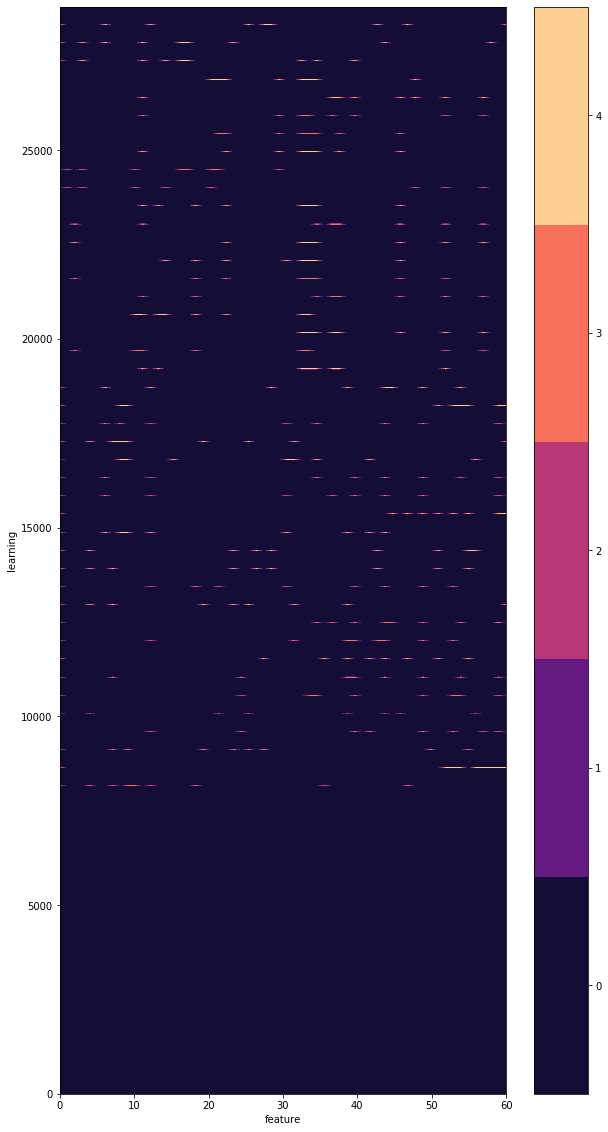

In [42]:
Z = np.concatenate((result1.numpy(), result2.numpy(), result3.numpy()), axis=0)
print(Z.shape)
X = np.linspace(0, Z.shape[1],Z.shape[1])
Y = np.linspace(0, Z.shape[0],Z.shape[0])
X, Y = np.meshgrid(X, Y)

plt.figure(figsize = (10,20))

plt.contourf(X, Y, Z, [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], cmap='magma')
plt.colorbar(ticks=range(5))
plt.ylabel("learning")
plt.xlabel("feature")